In [2]:
import pandas as pd
import catboost

In [15]:
%matplotlib inline  

In [45]:
df = pd.read_csv('../data/expanded_data_with_OSM.csv')

In [46]:
df = df[df['test_train_flag'] == 'train']

In [48]:
df_train = pd.read_csv('../data/train.csv')

In [49]:
df = df.merge(df_train[['id','target']], left_on = 'id', right_on = 'id')

In [50]:
df['atm_group'] = df['atm_group'].astype('int')
df['cities'] = df['cities'].astype(str)
df['regions'] = df['regions'].astype(str)
df['states'] = df['states'].astype(str)
df['address'] = df['address'].astype(str)
df['address_rus'] = df['address_rus'].astype(str)
df['geometry'] = df['geometry'].astype(str)
df['id'] = df['id'].astype(int)

In [51]:
df.head(1)

,id,atm_group,address,address_rus,lat,lng,test_train_flag,geometry,distance_to_fast_food,distance_to_clothes,...,distance_to_airport,distance_to_parking,distance_to_parking_underground,cnt_apart_200m,cnt_banks_200m,cnt_atm_200m,cities,regions,states,target
0,8526,32,"EMELYANOVA,34 Y-SAKHALINSK","улица А.О. Емельянова, 34, Южно-Сахалинск, Сах...",46.940995,142.738319,train,POINT (142.738319 46.940994999999994),1101.997929,815.369715,...,39774.216642,2892.577916,2346.129844,9,0,0,Yuzhno-Sakhalinsk,Far Eastern Federal District,Sakhalin Oblast,0.0115


<center><font size="5">Линейные модели </font></center>

In [ ]:
# todo линейные модели тут

<center><font size="5"> Catboost</font></center>

In [9]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(['target', 'test_train_flag'], axis=1)
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
from catboost import Pool

<AxesSubplot: xlabel='Count', ylabel='atm_group'>

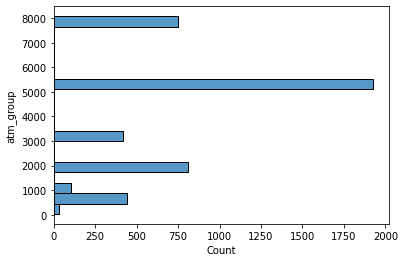

In [13]:
import seaborn as sns

sns.histplot(data=df, y=X_train['atm_group'].sort_values())

In [68]:
categorical_features = ['cities', 'regions', 'states', 'atm_group', 'address', 'address_rus', 'geometry']
ignored_features = ['address', 'address_rus', 'geometry']

clf_params = {
    'cat_features': categorical_features,
    'ignored_features': ignored_features,
    'bagging_temperature': 1,
    'custom_metric': ['RMSE'],
    'score_function': 'L2',
#     'use_best_model': True,
    'iterations': 200
}

train_pool = Pool(X_train, y_train, cat_features=categorical_features, feature_names=list(X_train.columns))
test_pool = Pool(X_test, y_test, cat_features=categorical_features, feature_names=list(X_test.columns))

catboost = CatBoostRegressor(**clf_params, loss_function='RMSE', eval_metric='R2')
model = catboost.fit(train_pool, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))


0.7500474081963067
0.0018635999906704433


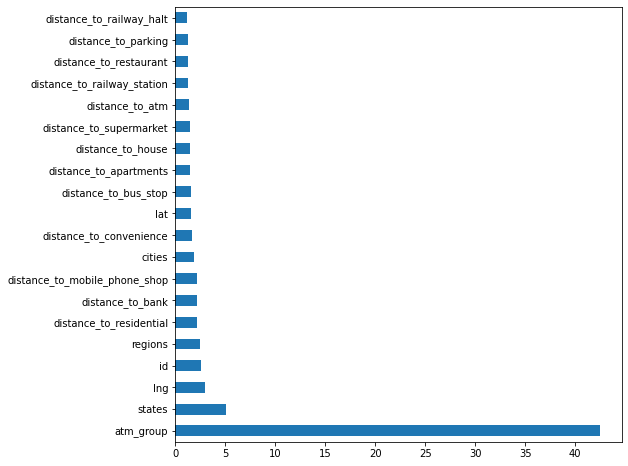

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')